In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from warnings import filterwarnings
import shutil

# todo: put back!!
#from DatasetsEvaluator.DatasetsEvaluator import DatasetsTester

import sys  
sys.path.insert(0, 'C:\python_projects\DatasetsEvaluator_project\DatasetsEvaluator')
import DatasetsEvaluator as de

filterwarnings('ignore')

In [2]:
cache_folder = "c:\\dataset_cache"
partial_result_folder = "c:\\intermediate_results"

In [3]:
# Generally we wish to delete the partial results folder in order to create it fresh each execution, unless
# this execution is continuing from a previous failure, such as power loss etc.
try:
    shutil.rmtree(partial_result_folder)
except:
    pass

## Example finding a single file

In [4]:
datasets_tester = de.DatasetsTester(problem_type="classification")
# todo: should be able to remove the de. now
matching_datasets = datasets_tester.find_by_name(['pol'])
matching_datasets

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
201,201,pol,1,1,active,ARFF,NaN,NaN,NaN,0.0,49.0,15000.0,0.0,0.0,49.0,0.0
722,722,pol,2,2,active,ARFF,9959.0,2.0,5041.0,2.0,49.0,15000.0,0.0,0.0,48.0,1.0


## Example finding all files attached to a tag

In [5]:
datasets_tester = de.DatasetsTester(problem_type="regression")
# todo: should be able to remove the de. now
matching_datasets = datasets_tester.find_by_tag("derived")
matching_datasets

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
378,378,ipums_la_99-small,1,2,active,ARFF,5803.0,3890.0,197.0,7.0,61.0,8844.0,8844.0,51515.0,0.0,61.0
381,381,ipums_la_98-small,1,2,active,ARFF,4802.0,3594.0,71.0,7.0,61.0,7485.0,7485.0,52048.0,0.0,61.0
382,382,ipums_la_97-small,1,2,active,ARFF,1938.0,488.0,258.0,8.0,61.0,7019.0,7019.0,48089.0,0.0,61.0
1038,1038,gina_agnostic,1,2,active,ARFF,1763.0,2.0,1705.0,2.0,971.0,3468.0,0.0,0.0,970.0,1.0
23512,23512,higgs,2,2,active,ARFF,51827.0,2.0,46223.0,2.0,29.0,98050.0,1.0,9.0,28.0,1.0
179,179,adult,1,1,active,ARFF,37155.0,41.0,11687.0,2.0,15.0,48842.0,3620.0,6465.0,2.0,13.0
991,991,car,2,2,active,ARFF,1210.0,4.0,518.0,2.0,7.0,1728.0,0.0,0.0,0.0,7.0
1037,1037,ada_prior,1,2,active,ARFF,3430.0,39.0,1132.0,2.0,15.0,4562.0,88.0,88.0,6.0,9.0
1040,1040,sylva_prior,1,2,active,ARFF,13509.0,2.0,886.0,2.0,109.0,14395.0,0.0,0.0,108.0,1.0
1041,1041,gina_prior2,1,2,active,ARFF,383.0,10.0,315.0,10.0,785.0,3468.0,0.0,0.0,784.0,1.0


## Example finding all datasets meeting some specified criteria

In [6]:
datasets_tester = de.DatasetsTester(problem_type="classification")
matching_datasets = datasets_tester.find_datasets(
    min_num_classes = 2,
    max_num_classes = 20,
    min_num_minority_class = 5,
    max_num_minority_class = np.inf,
    min_num_features = 0,
    max_num_features = np.inf,
    min_num_instances = 500,
    max_num_instances = 5_000,
    min_num_numeric_features = 2,
    max_num_numeric_features = 50,
    min_num_categorical_features=0,
    max_num_categorical_features=50)

print("Number matching datasets found:", len(matching_datasets))
display(matching_datasets.head())

Number matching datasets found: 237


,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
2,2,anneal,1,1,active,ARFF,684.0,7.0,8.0,5.0,39.0,898.0,898.0,22175.0,6.0,33.0
11,11,balance-scale,1,1,active,ARFF,288.0,3.0,49.0,3.0,5.0,625.0,0.0,0.0,4.0,1.0
15,15,breast-w,1,1,active,ARFF,458.0,2.0,241.0,2.0,10.0,699.0,16.0,16.0,9.0,1.0
18,18,mfeat-morphological,1,1,active,ARFF,200.0,10.0,200.0,10.0,7.0,2000.0,0.0,0.0,6.0,1.0
22,22,mfeat-zernike,1,1,active,ARFF,200.0,10.0,200.0,10.0,48.0,2000.0,0.0,0.0,47.0,1.0


## Example collecting the datasets specified above and running classification tests

In [7]:
# After viewing the matching datasets, it's possible to collect all, or some subset of these. The following
# code collects 5 matching datasets.
# Note: some datasets may have errors loading. 
# Note: As this uses the default False for keep_duplicated_names, some datasets may be removed. Consequently, 
# the datasets returned may not be first in the table above. 
# Note: this can be somewhat slow at times. Examples below demonstrate some of the caching features available.
datasets_tester.collect_data(max_num_datasets_used=5, method_pick_sets='pick_first', preview_data=False) 

dt_1 = tree.DecisionTreeClassifier(min_samples_split=50, max_depth=6, random_state=0)
dt_2 = tree.DecisionTreeClassifier(min_samples_split=25, max_depth=5, random_state=0)
knn_1 = KNeighborsClassifier(n_neighbors=5)
knn_2 = KNeighborsClassifier(n_neighbors=10)

summary_df, _ = datasets_tester.run_tests(estimators_arr = [
        ("Decision Tree", "", "min_samples_split=50, max_depth=6", dt_1),
        ("Decision Tree", "", "min_samples_split=25, max_depth=5", dt_2),
        ("kNN", "", "n_neighbors=5", knn_1),
        ("kNN", "", "n_neighbors=10", knn_2)])

display(summary_df)

 Loading dataset from openml: 0, id: 15, name: breast-w
 Loading dataset from openml: 1, id: 29, name: credit-approval
 Loading dataset from openml: 2, id: 31, name: credit-g
 Loading dataset from openml: 3, id: 37, name: diabetes
 Loading dataset from openml: 4, id: 38, name: sick

Running test on 5 datastets
Running tests on dataset index: 0, dataset: breast-w
	Running tests with model: Decision Tree (), (min_samples_split=50, max_depth=6)
	scores for Decision Tree: [0.90175439 0.90580848 0.9148183  0.9601707  0.88835341]
	Running tests with model: Decision Tree (), (min_samples_split=25, max_depth=5)
	scores for Decision Tree: [0.86573963 0.90580848 0.95244565 0.98430141 0.88835341]
	Running tests with model: kNN (), (n_neighbors=5)
	scores for kNN: [0.91045991 0.9383124  0.98430141 0.99211312 0.97601381]
	Running tests with model: kNN (), (n_neighbors=10)
	scores for kNN: [0.88399621 0.9383124  0.98414855 0.97610242 0.9920046 ]
Running tests on dataset index: 1, dataset: credit-app

,Dataset Index,Dataset,Dataset Version,Model,Feature Engineering Description,Hyperparameter Description,Avg f1_macro,Std dev between folds,Train-Test Gap,# Columns,Model Complexity,Fit Time
0,0,breast-w,1,Decision Tree,,"min_samples_split=50, max_depth=6",0.914181,0.027418,0.039338,9,18.2,0.001594
1,0,breast-w,1,Decision Tree,,"min_samples_split=25, max_depth=5",0.919330,0.048302,0.041924,9,20.2,0.001597
2,0,breast-w,1,kNN,,n_neighbors=5,0.960240,0.034650,0.015801,9,0.0,0.001999
3,0,breast-w,1,kNN,,n_neighbors=10,0.954913,0.044677,0.009826,9,0.0,0.001599
4,1,credit-approval,1,Decision Tree,,"min_samples_split=50, max_depth=6",0.813839,0.142290,0.078729,65,32.2,0.002002
5,1,credit-approval,1,Decision Tree,,"min_samples_split=25, max_depth=5",0.816581,0.125651,0.083456,65,31.4,0.002392
6,1,credit-approval,1,kNN,,n_neighbors=5,0.678681,0.047804,0.101645,65,0.0,0.001196
7,1,credit-approval,1,kNN,,n_neighbors=10,0.682375,0.036452,0.049373,65,0.0,0.001795
8,2,credit-g,1,Decision Tree,,"min_samples_split=50, max_depth=6",0.625053,0.050662,0.100991,89,39.0,0.003200
9,2,credit-g,1,Decision Tree,,"min_samples_split=25, max_depth=5",0.609378,0.035083,0.117334,89,38.6,0.002991


## Example displaying a summarization of the results

In [8]:
s = datasets_tester.summarize_results(summary_df, accuracy_metric='Avg f1_macro')
display(s)

,,Avg f1_macro,Avg. Train-Test Gap,Avg. Fit Time,Avg. Complexity
Model,Feature Engineering Description,,,,
Decision Tree,,0.796228,0.067956,0.003375,32.28
kNN,,0.678150,0.067115,0.002114,0.00


## Example Plotting results

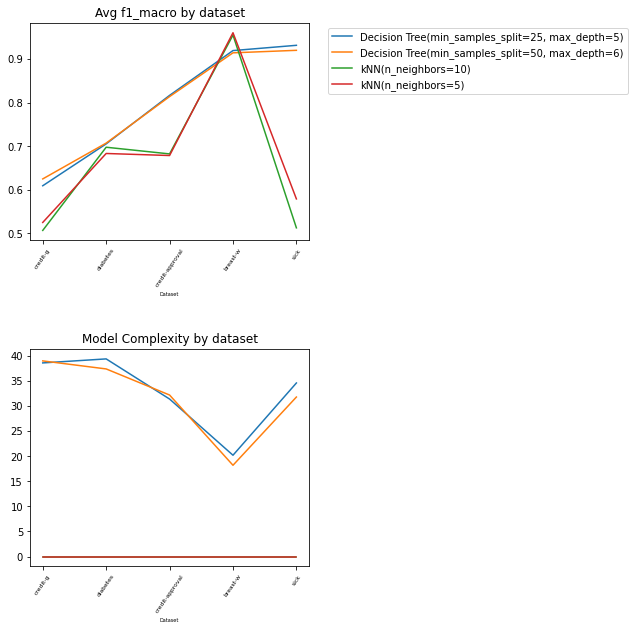

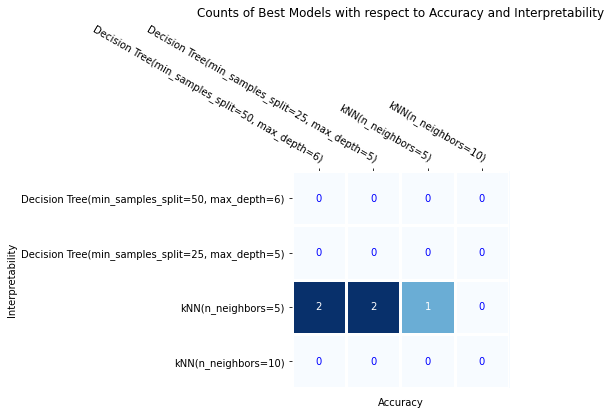

In [9]:
datasets_tester.plot_results(summary_df, accuracy_metric='Avg f1_macro')

## Example collecting regression datasets and performing regression tests on these

In [10]:
datasets_tester = de.DatasetsTester(problem_type = "regression")

# This example uses the default settings to select the datasets, then displays the results. 
# In the subsequent cell, we choose to collect a subset of these. 
matching_datasets = datasets_tester.find_datasets()
print("Number matching datasets found:", len(matching_datasets))
display(matching_datasets.head())

Number matching datasets found: 98


,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
209,209,quake,1,1,active,ARFF,NaN,NaN,NaN,0.0,4.0,2178.0,0.0,0.0,4.0,0.0
223,223,stock,1,1,active,ARFF,NaN,NaN,NaN,0.0,10.0,950.0,0.0,0.0,10.0,0.0
482,482,arsenic-male-bladder,1,2,active,ARFF,NaN,43.0,NaN,0.0,5.0,559.0,0.0,0.0,4.0,1.0
494,494,analcatdata_hiroshima,1,2,active,ARFF,NaN,1.0,NaN,0.0,3.0,649.0,0.0,0.0,2.0,1.0
504,504,analcatdata_supreme,1,2,active,ARFF,NaN,NaN,NaN,0.0,8.0,4052.0,0.0,0.0,8.0,0.0


In [11]:
dt = tree.DecisionTreeRegressor(min_samples_split=50, max_depth=5, random_state=0)
knn = KNeighborsRegressor(n_neighbors=10)

datasets_tester.collect_data(max_num_datasets_used=10)

# This provides an example using some non-default parameters. 
summary_df,_ = datasets_tester.run_tests(estimators_arr = [
                                        ("Decision Tree", "Original Features", "Default", dt),
                                        ("kNN", "Original Features", "Default", knn)],
                                       num_cv_folds=3,
                                       scoring_metric='r2',
                                       show_warnings=True) 

display(summary_df)

 Loading dataset from openml: 0, id: 494, name: analcatdata_hiroshima
 Loading dataset from openml: 1, id: 598, name: fri_c0_1000_25
 Loading dataset from openml: 2, id: 1029, name: LEV
 Loading dataset from openml: 3, id: 546, name: sensory
 Loading dataset from openml: 4, id: 536, name: arsenic-male-lung
 Loading dataset from openml: 5, id: 1589, name: svmguide3
 Loading dataset from openml: 6, id: 23516, name: debutanizer
 Loading dataset from openml: 7, id: 42437, name: titanic
 Loading dataset from openml: 8, id: 606, name: fri_c2_1000_10
 Loading dataset from openml: 9, id: 42369, name: weather_izmir

Running test on 10 datastets
Running tests on dataset index: 0, dataset: analcatdata_hiroshima
	Running tests with model: Decision Tree (Original Features), (Default)
	scores for Decision Tree: [-15.00625192  -5.40844744  -1.16246994]
	Running tests with model: kNN (Original Features), (Default)
	scores for kNN: [-7.11239332 -3.49780352 -1.69226758]
Running tests on dataset index: 1

,Dataset Index,Dataset,Dataset Version,Model,Feature Engineering Description,Hyperparameter Description,Avg r2,Std dev between folds,Train-Test Gap,# Columns,Model Complexity,Fit Time
0,0,analcatdata_hiroshima,1,Decision Tree,Original Features,Default,-7.192390,7.092208,7.534345,4,9.666667,0.001024
1,0,analcatdata_hiroshima,1,kNN,Original Features,Default,-4.100821,2.759921,4.153182,4,0.000000,0.000986
2,1,fri_c0_1000_25,1,Decision Tree,Original Features,Default,0.633444,0.022097,0.104857,25,35.000000,0.003987
3,1,fri_c0_1000_25,1,kNN,Original Features,Default,0.421831,0.006963,0.128163,25,0.000000,0.000665
4,2,LEV,1,Decision Tree,Original Features,Default,0.466828,0.051950,0.089334,4,38.333333,0.001336
5,2,LEV,1,kNN,Original Features,Default,0.509897,0.056924,0.103255,4,0.000000,0.001343
6,3,sensory,1,Decision Tree,Original Features,Default,-0.559981,0.148113,0.882808,58,20.333333,0.000981
7,3,sensory,1,kNN,Original Features,Default,-0.174554,0.119344,0.521286,58,0.000000,0.001009
8,4,arsenic-male-lung,1,Decision Tree,Original Features,Default,0.031764,0.068430,0.443396,3,18.333333,0.000996
9,4,arsenic-male-lung,1,kNN,Original Features,Default,0.003057,0.053331,0.388214,3,0.000000,0.000654


## Example writing to and reading from local cache

In [12]:
datasets_tester = de.DatasetsTester(problem_type = "classification", path_local_cache=cache_folder)
matching_datasets = datasets_tester.find_datasets()

# This will read from openml.org
datasets_tester.collect_data(max_num_datasets_used=5, save_local_cache=True)

# This will read from the local cache
datasets_tester.collect_data(max_num_datasets_used=5, check_local_cache=True)

 Loading dataset from openml: 0, id: 1494, name: qsar-biodeg
 Loading dataset from openml: 1, id: 40680, name: mofn-3-7-10
 Loading dataset from openml: 2, id: 805, name: fri_c4_500_50
 Loading dataset from openml: 3, id: 937, name: fri_c3_500_50
 Loading dataset from openml: 4, id: 1480, name: ilpd
 Reading from local cache: 0, id: 1494, name: qsar-biodeg
 Reading from local cache: 1, id: 40680, name: mofn-3-7-10
 Reading from local cache: 2, id: 805, name: fri_c4_500_50
 Reading from local cache: 3, id: 937, name: fri_c3_500_50
 Reading from local cache: 4, id: 1480, name: ilpd


## Example Comparing Two Pipelines

In [13]:
datasets_tester = de.DatasetsTester(problem_type="classification")
matching_datasets = datasets_tester.find_by_name(['arsenic-male-bladder'])
datasets_tester.collect_data() 

pipe1 = Pipeline([('scaler', MinMaxScaler()), ('knn_classifier', KNeighborsClassifier())])
pipe2 = Pipeline([('scaler', StandardScaler()), ('knn_classifier', KNeighborsClassifier())])

# This provides an example using some non-default parameters. 
summary_df, _ = datasets_tester.run_tests(estimators_arr = [
                                        ("kNN with MinMaxScaler", "Original Features", "Default", pipe1),
                                        ("kNN with StandardScaler", "Original Features", "Default", pipe2)],
                                       num_cv_folds=3,
                                       show_warnings=True) 

display(summary_df)

 Loading dataset from openml: 0, id: 947, name: arsenic-male-bladder

Running test on 1 datastets
Running tests on dataset index: 0, dataset: arsenic-male-bladder
	Running tests with model: kNN with MinMaxScaler (Original Features), (Default)
	scores for kNN with MinMaxScaler: [0.85511364 0.48901099 0.48901099]
	Running tests with model: kNN with StandardScaler (Original Features), (Default)
	scores for kNN with StandardScaler: [1.         0.60146924 0.48901099]


,Dataset Index,Dataset,Dataset Version,Model,Feature Engineering Description,Hyperparameter Description,Avg f1_macro,Std dev between folds,Train-Test Gap,# Columns,Model Complexity,Fit Time
0,0,arsenic-male-bladder,2,kNN with MinMaxScaler,Original Features,Default,0.611045,0.211369,0.209692,3,0,0.001658
1,0,arsenic-male-bladder,2,kNN with StandardScaler,Original Features,Default,0.696827,0.268509,0.123910,3,0,0.002009


## Example Resuming after a failure

In [14]:
# run_tests() has the ability to save intermediate results to a folder and continue after a failure from a given
# start point. This example simulates this by setting ending_point in the first call to run_tests() and
# setting starting_point in the 2nd call. 

try:
    shutil.rmtree(partial_result_folder)
except:
    pass

datasets_tester = de.DatasetsTester(problem_type="classification", path_local_cache=cache_folder)
matching_datasets = datasets_tester.find_by_name(['pol', 'credit-g'])

datasets_tester.collect_data(save_local_cache=True, check_local_cache=True) 
ds = datasets_tester.get_dataset_collection()

datasets_tester.run_tests(
    estimators_arr = [("dt", "", "max_depth=2", tree.DecisionTreeClassifier(max_depth=2)),
                      ("dt", "", "max_depth=3", tree.DecisionTreeClassifier(max_depth=3))],
    num_cv_folds=3,
    show_warnings=True,
    ending_point=0,
    partial_result_folder=partial_result_folder)

summary_df,_ = datasets_tester.run_tests(
    estimators_arr = [("dt", "", "max_depth=2", tree.DecisionTreeClassifier(max_depth=2)),
                     ("dt", "", "max_depth=3", tree.DecisionTreeClassifier(max_depth=3))],
    num_cv_folds=3,
    show_warnings=True,
    starting_point=1,
    partial_result_folder=partial_result_folder)

summary_df

 Reading from local cache: 0, id: 31, name: credit-g
 Reading from local cache: 1, id: 722, name: pol

Running test on 2 datastets
Running tests on dataset index: 0, dataset: credit-g
	Running tests with model: dt (), (max_depth=2)
	scores for dt: [0.65388601 0.53702758 0.63851498]
	Running tests with model: dt (), (max_depth=3)
	scores for dt: [0.64513144 0.56090787 0.52037037]

Running test on 2 datastets
Running tests on dataset index: 1, dataset: pol
	Running tests with model: dt (), (max_depth=2)
	scores for dt: [0.81840166 0.83227275 0.83105266]
	Running tests with model: dt (), (max_depth=3)
	scores for dt: [0.87502015 0.89233269 0.89247716]


,Dataset Index,Dataset,Dataset Version,Model,Feature Engineering Description,Hyperparameter Description,Avg f1_macro,Std dev between folds,Train-Test Gap,# Columns,Model Complexity,Fit Time
0,0,credit-g,1,dt,,max_depth=2,0.609810,0.063498,0.029317,74,7.0,0.001330
1,0,credit-g,1,dt,,max_depth=3,0.575470,0.063643,0.060263,74,15.0,0.002331
2,1,pol,2,dt,,max_depth=2,0.827242,0.007681,0.000304,48,7.0,0.011962
3,1,pol,2,dt,,max_depth=3,0.886610,0.010037,0.000483,48,15.0,0.013962
